<a href="https://colab.research.google.com/github/falecomnataliasouza/Spark-com-linguagem-python/blob/master/%5BAccenture%5DSpark_com_linguagem_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 3.0.1 with hadoop 2.7 and Java 8. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python. 
Follow the steps to install the dependencies:

In [ ]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
40 packages can be upgraded. Run '

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Run a local spark session to test your installation:

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
spark

# Aula 1 - Introdução aos Dataframes



# Reading a CSV from google drive

Utilizando o Google Colab, é possível importar os datasets diretamente do Google Drive, sem ter que realizar o upload manual dos mesmos para a instância colab manualmente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spark.read\
  .option("inferSchema", "true") \
  .option("header", "true") \
  .option("delimiter", ",") \
  .csv("/content/drive/My Drive/Big Data/vgsales.csv") \
  .show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

**O Spark é feito para ler e particionar grandes quantidade de dados, então uma das formas de "ler" e "tratar" os dados recebidos é atráves do Dataframe. O que foi feito até agora é só preparo do ambiente e dos dados.**

# Introdução aos Dataframes
Nessa aula, daremos uma breve explicação do que vêm a ser **Dataframes** no âmbito do Apache Spark e como eles podem ser muito úteis na construção de aplicações escaláveis. Construiremos um dataframe baseado em um arquivo .csv de testes.

Dataframe são uma das formas que temos os arquivos dentro do Spark

### Overwiew de uma aplicação Spark
Relembrando o conceito de uma aplicação Spark submetida a um cluster
![Spark](https://spark.apache.org/docs/latest/img/cluster-overview.png)
*Fonte: https://spark.apache.org/docs/latest/cluster-overview.html*

Podemos ver aqui dois processos principais:

- Executors: processo responsável por realizar a computação bruta dos dados, de forma paralela, ou seja, cada executor em um cluster irá processar uma parte dos dados.
- Driver: processo responsável por coordenar a aplicação e enviar instrução de processamento (transformações) para os executores e receber os resultados das ações. **Códigos não paralelizáveis (códigos que não usufruem dos Dataframes ou RDDs), consumirão poder de processamento e memória do processo Driver**. Exemplo: Pandas

SparkSession

O SparkSession é o objeto responsável por criar Dataframes, ou seja, estrutura de dados paralelizáveis semelhante aos dataframes do framework pandas e da linguagem R. Em modos interativos, como é o caso do CLI pyspark, o objeto SparkSession já vem previamente instânciado, permitindo ao usuário, o uso imediato. Para checar, basta rodar o comando abaixo:

In [ ]:
spark

Exemplos a seguir é sobre a construção dos DataFrames dentro do Spark, não sobre o Spark

### Criando um Spark Dataframe a partir de um array de dicionários

In [ ]:
data_dict = [{
    "nome":"Jose",
    "idade": 52,
    "profissao": "Advogado"
},{
    "nome":"Maria",
    "idade": 35,
    "profissao": "Médico"
},{
    "nome":"Pedro",
    "idade": 25,
    "profissao": "Estudante"
}]

data_dict

[{'idade': 52, 'nome': 'Jose', 'profissao': 'Advogado'},
 {'idade': 35, 'nome': 'Maria', 'profissao': 'Médico'},
 {'idade': 25, 'nome': 'Pedro', 'profissao': 'Estudante'}]

**Método do SparkSession, createDataFrame responsável por criar o DataFrame**

Aqui, independente de ser uma lista, um dicionário, é assim que o DataFrame é criado dentro do Spark

In [ ]:
df = spark.createDataFrame(data_dict)

/usr/local/lib/python3.6/dist-packages/pyspark/sql/session.py:381: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


**Método show() responsável por exibir o DataFrame**

In [ ]:
df.show()

+-----+-----+---------+
|idade| nome|profissao|
+-----+-----+---------+
|   52| Jose| Advogado|
|   35|Maria|   Médico|
|   25|Pedro|Estudante|
+-----+-----+---------+



**Printando o schema do DataFrame**


In [ ]:
df.printSchema()

root
 |-- idade: long (nullable = true)
 |-- nome: string (nullable = true)
 |-- profissao: string (nullable = true)



## Criando um dataframe a partir de um arquivo CSV

[Usando um arquivo escolhido]


Utilizaremos um dataset que contém algumas das vendas de jogos para consoles. O mesmo se encontra em https://www.kaggle.com/gregorut/videogamesales/data.

Obs.: é necessário criar uma conta no Kaggle para isso.

Realizado o download, importe-o para dentro do armazenamento no seu notebook. Todos os arquivos de dados dentro de uma seção irão ser removidos após a finalização da mesma. Caso deseje salvar permanentemente os arquivos de dados, utilize a opção de importar do Google Drive (seção "Reading a CSV from google drive").

In [ ]:
data_dir = "vgsales.csv"

**Aqui eu estou lendo local, não do drive**

##Sem inferência de schema


In [ ]:
df = spark.read.load(data_dir, format="csv", header="true")

Visualizando o Dataframe Lido

In [ ]:
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|          33|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

Visualizando o Schema

In [ ]:
df.printSchema()

root
 |-- Rank: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: string (nullable = true)
 |-- EU_Sales: string (nullable = true)
 |-- JP_Sales: string (nullable = true)
 |-- Other_Sales: string (nullable = true)
 |-- Global_Sales: string (nullable = true)



##Usando a opção para inferir o schema dos dados automaticamente

In [ ]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")

In [ ]:
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



##Utilizando um schema definido pelo usuário

Aqui eu importei os tipos de variáveis que eu quero

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

schema = StructType([
    StructField("new_rank", IntegerType(), True),
    StructField("new_name", StringType(), True),
    StructField("new_platform", StringType(), True),
    StructField("new_year", IntegerType(), True),
    StructField("new_genre", StringType(), True),
    StructField("new_publisher", StringType(), True),
    StructField("new_na_sales", DoubleType(), True),
    StructField("new_eu_sales", DoubleType(), True),
    StructField("new_jp_sales", DoubleType(), True),
    StructField("new_other_sales", DoubleType(), True),
    StructField("new_global_sales", DoubleType(), True)
])

In [ ]:
df = spark.read.load(data_dir, format="csv", schema=schema, header="true")

In [ ]:
df.printSchema()

root
 |-- new_rank: integer (nullable = true)
 |-- new_name: string (nullable = true)
 |-- new_platform: string (nullable = true)
 |-- new_year: integer (nullable = true)
 |-- new_genre: string (nullable = true)
 |-- new_publisher: string (nullable = true)
 |-- new_na_sales: double (nullable = true)
 |-- new_eu_sales: double (nullable = true)
 |-- new_jp_sales: double (nullable = true)
 |-- new_other_sales: double (nullable = true)
 |-- new_global_sales: double (nullable = true)



In [ ]:
df.show()

+--------+--------------------+------------+--------+------------+--------------------+------------+------------+------------+---------------+----------------+
|new_rank|            new_name|new_platform|new_year|   new_genre|       new_publisher|new_na_sales|new_eu_sales|new_jp_sales|new_other_sales|new_global_sales|
+--------+--------------------+------------+--------+------------+--------------------+------------+------------+------------+---------------+----------------+
|       1|          Wii Sports|         Wii|    2006|      Sports|            Nintendo|       41.49|       29.02|        3.77|           8.46|           82.74|
|       2|   Super Mario Bros.|         NES|    1985|    Platform|            Nintendo|       29.08|        3.58|        6.81|           0.77|           40.24|
|       3|      Mario Kart Wii|         Wii|    2008|      Racing|            Nintendo|       15.85|       12.88|        3.79|           3.31|           35.82|
|       4|   Wii Sports Resort|         

## Formatos suportados
O Spark é capaz de ler uma gama de arquivos e fontes de dados nativamente. Dentre eles, temos:

- CSV
- JSON (JSON lines text format)
- Parquet files
- ORC files
- Hive tables
- JDBC (MySQL, Postgresql, Oracle, SAP, e inúmeros outros BDs)
- Avro

É possível também encontrar dependências de terceiros, que apliam ainda mais o leque de opções de fontes de dados para o Spark. Ler mais em https://spark.apache.org/third-party-projects.html

# Exercícios
Para iniciar os exercícios, configure a variável abaixo para que possa apontar para o caminho correto em seu ambiente de desenvolvimento:


In [ ]:
data_dir = '/content/drive/My Drive/Big Data/vgsales.csv'

In [ ]:
df = spark.read.load(data_dir, format="csv", header="true")

In [ ]:
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|          33|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [ ]:
df.printSchema()

root
 |-- Rank: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: string (nullable = true)
 |-- EU_Sales: string (nullable = true)
 |-- JP_Sales: string (nullable = true)
 |-- Other_Sales: string (nullable = true)
 |-- Global_Sales: string (nullable = true)



1) Leia o arquivo vgsales.csv em formato de inferência de schema e header desativado:

In [ ]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="false")
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
| _c0|                 _c1|     _c2| _c3|         _c4|                 _c5|     _c6|     _c7|     _c8|        _c9|        _c10|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|  

Para auxiliar na visualização dos resultados, execute o paragrafo abaixo para definir a função display_df():

In [ ]:
def display_df(df, n=20):
    return df.limit(n).toPandas()

In [ ]:
display_df(df)

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10
0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62


2) Leia o arquivo vgsales.csv com um schema pré-definido e header ativado:

Obs.: considere todos os valores numéricos como inteiros para esse exercício


Utilizando um schema definido pelo usuário

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

schema = StructType([
    StructField("new_rank", IntegerType(), True),
    StructField("new_name", StringType(), True),
    StructField("new_platform", StringType(), True),
    StructField("new_year", IntegerType(), True),
    StructField("new_genre", StringType(), True),
    StructField("new_publisher", StringType(), True),
    StructField("new_na_sales", IntegerType(), True),
    StructField("new_eu_sales", IntegerType(), True),
    StructField("new_jp_sales", IntegerType(), True),
    StructField("new_other_sales", IntegerType(), True),
    StructField("new_global_sales", IntegerType(), True)
])


In [ ]:
df = spark.read.load(data_dir, format="csv", schema=schema, header="true")

In [ ]:
df.printSchema()

root
 |-- new_rank: integer (nullable = true)
 |-- new_name: string (nullable = true)
 |-- new_platform: string (nullable = true)
 |-- new_year: integer (nullable = true)
 |-- new_genre: string (nullable = true)
 |-- new_publisher: string (nullable = true)
 |-- new_na_sales: integer (nullable = true)
 |-- new_eu_sales: integer (nullable = true)
 |-- new_jp_sales: integer (nullable = true)
 |-- new_other_sales: integer (nullable = true)
 |-- new_global_sales: integer (nullable = true)



In [ ]:
df.show()

+--------+--------------------+------------+--------+------------+--------------------+------------+------------+------------+---------------+----------------+
|new_rank|            new_name|new_platform|new_year|   new_genre|       new_publisher|new_na_sales|new_eu_sales|new_jp_sales|new_other_sales|new_global_sales|
+--------+--------------------+------------+--------+------------+--------------------+------------+------------+------------+---------------+----------------+
|       1|          Wii Sports|         Wii|    2006|      Sports|            Nintendo|        null|        null|        null|           null|            null|
|       2|   Super Mario Bros.|         NES|    1985|    Platform|            Nintendo|        null|        null|        null|           null|            null|
|       3|      Mario Kart Wii|         Wii|    2008|      Racing|            Nintendo|        null|        null|        null|           null|            null|
|       4|   Wii Sports Resort|         

Para auxiliar na visualização dos resultados, execute o paragrafo abaixo para definir a função display_df():

In [ ]:
def display_df(df, n=20):
    return df.limit(n).toPandas()

In [ ]:
display_df(df)
#df.show()

,new_rank,new_name,new_platform,new_year,new_genre,new_publisher,new_na_sales,new_eu_sales,new_jp_sales,new_other_sales,new_global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,NaN,NaN,NaN,NaN,NaN
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,NaN,NaN,NaN,NaN
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,NaN,NaN,NaN,NaN,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,NaN,NaN,NaN,1.0,NaN
5,6,Tetris,GB,1989,Puzzle,Nintendo,NaN,NaN,NaN,NaN,NaN
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
7,8,Wii Play,Wii,2006,Misc,Nintendo,NaN,NaN,NaN,NaN,NaN
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,NaN,NaN,NaN,NaN,NaN


# Aula 2 - Transformações e ações com Dataframes

# Transformações e ações com Dataframes
Nessa aula, daremos passaremos sobre o que vem a ser transformação e ação. Veremos como esses conceitos são utilizados se tratando dos Dataframes e quais ações são possíveis de serem realizadas utilizando SparkSQL.

## Pré-requisitos:
Instalar as bibliotecas `pandas` e `matplotlib`:


In [ ]:
!pip install pandas
!pip install matplotlib

## Carregando o dataset videogamesales


Mais uma vez, importando local

In [ ]:
data_dir = "vgsales.csv"

Usando a opção para inferir o schema dos dados automaticamente

In [ ]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



In [ ]:
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

Visualizar o dataset de uma forma mais amigável

In [ ]:
df.toPandas().head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Definindo um método para plotar Dataframes Spark

Só uma apresentação mais bonitinha

In [ ]:
def display_df(df, n=20):
    return df.limit(n).toPandas()

## Descrevendo estatisticamente o Dataframe

In [ ]:
display_df(df.describe())

,summary,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,count,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598
1,mean,8300.605253645017,1942.0,2600.0,2006.4064433147546,None,None,0.26466742981084057,0.1466520062658483,0.07778166044101108,0.048063019640913515,0.53744065550074
2,stddev,4791.8539328964,NaN,0.0,5.828981114713253,None,None,0.8166830292988798,0.5053512312869136,0.3092906480822022,0.18858840291271395,1.5550279355699066
3,min,1,'98 Koshien,2600,1980,Action,10TACLE Studios,0.0,0.0,0.0,0.0,0.01
4,max,16600,¡Shin Chan Flipa en colores!,XOne,N/A,Strategy,responDESIGN,41.49,29.02,10.22,10.57,82.74


# Análise exploratória dos dados
Vamos aqui realizar uma série de queries sobre os dados utilizando as APIs para Spark em Python (Pyspark) e o framework SparkSQL. Para isso, seguem algumas perguntas analiticas.

Aqui, ainda é sobre coletar tudo dos Dataframes, semelhante ao SQL, que você "perguntar" coisas para tabela

In [ ]:
df.columns

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

### Quais foram os top 10 jogos mais vendidos até os anos 2000?
**Pyspark API**

In [ ]:
import pyspark.sql.functions as f  #precisa importa a função para a leitura abaixo

# df -> T1 -> df2
# df2 -> T2 -> df3
# df3 -> T3 -> df4
# df4 -> T4 -> df5
# df5 -> A1

#ele usa filtro e pede números descendentes

sales_2000 = df.select("Name", "Global_Sales", "Year") \
    .filter(f.col("Year") <= 2000) \
    .orderBy(f.desc("Global_Sales")) \
    .limit(10)

display_df(sales_2000)  

,Name,Global_Sales,Year
0,Super Mario Bros.,40.24,1985
1,Pokemon Red/Pokemon Blue,31.37,1996
2,Tetris,30.26,1989
3,Duck Hunt,28.31,1984
4,Pokemon Gold/Pokemon Silver,23.10,1999
5,Super Mario World,20.61,1990
6,Super Mario Land,18.14,1989
7,Super Mario Bros. 3,17.28,1988
8,Pokémon Yellow: Special Pikachu Edition,14.64,1998
9,Super Mario 64,11.89,1996


In [ ]:
#Para funções ascendentes

sales_2000 = df.select("Name", "Global_Sales", "Year") \
    .filter(f.col("Year") <= 2000) \
    .orderBy(f.asc("Global_Sales")) \
    .limit(10)

display_df(sales_2000)  

,Name,Global_Sales,Year
0,Mortal Kombat,0.01,1994
1,Meru Purana,0.01,1996
2,Empire Deluxe,0.01,1992
3,Rock N' Roll Racing,0.01,1993
4,Vanark,0.01,1999
5,Deus Ex,0.01,2000
6,K-1 Grand Prix,0.01,1999
7,Legoland,0.01,1999
8,Victory Spike,0.01,1996
9,Builder's Block,0.01,1999


**Spark SQL**

Aqui é a mesma pergunra, mas por formato SQL

In [ ]:
#ele cria uma view como referência para a consulta
#Uso da classificação descendente

df.createOrReplaceTempView("videogame_sales")

sales_2000 = spark.sql("""
    SELECT 
      Name, 
      Global_Sales
    FROM videogame_sales
    WHERE Year <= 2000
    ORDER BY Global_Sales DESC
    LIMIT 10
""")

display_df(sales_2000)


,Name,Global_Sales
0,Super Mario Bros.,40.24
1,Pokemon Red/Pokemon Blue,31.37
2,Tetris,30.26
3,Duck Hunt,28.31
4,Pokemon Gold/Pokemon Silver,23.10
5,Super Mario World,20.61
6,Super Mario Land,18.14
7,Super Mario Bros. 3,17.28
8,Pokémon Yellow: Special Pikachu Edition,14.64
9,Super Mario 64,11.89


In [ ]:
#Uso da classificação ascendente

sales_2000 = spark.sql("""
    SELECT 
      Name, 
      Global_Sales
    FROM videogame_sales
    WHERE Year <= 2000
    ORDER BY Global_Sales ASC
    LIMIT 10
""")

display_df(sales_2000)

,Name,Global_Sales
0,Mortal Kombat,0.01
1,Meru Purana,0.01
2,Empire Deluxe,0.01
3,Rock N' Roll Racing,0.01
4,Vanark,0.01
5,Deus Ex,0.01
6,K-1 Grand Prix,0.01
7,Legoland,0.01
8,Victory Spike,0.01
9,Builder's Block,0.01


### Qual foi o total de vendas em NA e Global por Platform no ano de 2005?
**Pyspark API**

In [ ]:
df.select("Platform", "Global_Sales") \
    .filter(f.col("Year") == 2005) \
    .groupBy("Platform") \
    .sum("Global_Sales")

DataFrame[Platform: string, sum(Global_Sales): double]

Aqui ele só mostra as etapas da Lazy evaluation, pois até um orderBy ou um show/ display, o Spark não mostra nada do resultado

In [ ]:
import pyspark.sql.functions as f

# df -> T1 -> df2
# df2 -> T2 -> df3
# df3 -> T3 (group by + agg) -> df4 o agg é uma função do group by
# df4 -> T4 -> df5
# df5 -> A1

sales_publisher_2005 = df.select("Platform", "Global_Sales", "NA_Sales") \
    .filter(f.col("Year") == 2005) \
    .groupBy("Platform") \
    .agg(
        f.sum("Global_sales").alias("Global_sales_Total"), 
        f.sum("NA_Sales").alias("NA_Sales_Total")
    ) \
    .orderBy(f.desc("Global_sales_Total"))

display_df(sales_publisher_2005)

,Platform,Global_sales_Total,NA_Sales_Total
0,PS2,160.65,85.60
1,DS,131.40,48.47
2,XB,49.17,34.84
3,PSP,44.23,24.48
4,GBA,33.90,21.70
5,GC,27.80,19.25
6,X360,8.32,6.89
7,PC,4.47,1.38


In [ ]:
sales_publisher_2005 = df.select("Platform", "Global_Sales", "NA_Sales") \
    .filter(f.col("Year") == 2005) \
    .groupBy("Platform") \
    .agg(
        f.sum("NA_Sales").alias("NA_Sales_Total"),
        f.sum("Global_sales").alias("Global_sales_Total")
    ) \
    .orderBy(f.desc("Global_sales_Total"))

display_df(sales_publisher_2005)

,Platform,NA_Sales_Total,Global_sales_Total
0,PS2,85.60,160.65
1,DS,48.47,131.40
2,XB,34.84,49.17
3,PSP,24.48,44.23
4,GBA,21.70,33.90
5,GC,19.25,27.80
6,X360,6.89,8.32
7,PC,1.38,4.47


**Spark SQL**

In [ ]:
df.createOrReplaceTempView("videogame_sales")

sales_publisher_2005 = spark.sql("""
    SELECT Platform, 
        SUM(NA_Sales) AS NA_Sales_Total,
        SUM(Global_Sales) AS Global_sales_Total
    FROM videogame_sales
    WHERE Year = 2005
    GROUP BY Platform
    ORDER BY Global_sales_Total DESC
""")

display_df(sales_publisher_2005)

,Platform,NA_Sales_Total,Global_sales_Total
0,PS2,85.60,160.65
1,DS,48.47,131.40
2,XB,34.84,49.17
3,PSP,24.48,44.23
4,GBA,21.70,33.90
5,GC,19.25,27.80
6,X360,6.89,8.32
7,PC,1.38,4.47


### Qual foi a evolução das arrecadações globais das plataformas PS2, PS3 e X360 ao longo dos anos?

O objetivo aqui é exibir um gráfico de linha com a evolução das arrecadações nas plataformas ao longo do tempo. Utilizaremos a API Pyspark para realizar essa plotagem


In [ ]:
import pyspark.sql.functions as f

timeline_sales = df.select("Platform", "Global_Sales", "Year") \
    .where("Platform in ('PS2', 'PS3', 'X360')") \
    .groupBy("Year", "Platform") \
    .agg(
        f.sum("Global_sales").alias("Global_sales_Total")
    ) \
    .orderBy(f.asc("Year"))

display_df(timeline_sales)

,Year,Platform,Global_sales_Total
0,2000,PS2,39.11
1,2001,PS2,166.43
2,2002,PS2,205.40
3,2003,PS2,184.29
4,2004,PS2,211.78
5,2005,X360,8.32
6,2005,PS2,160.65
7,2006,PS2,103.42
8,2006,PS3,21.07
9,2006,X360,51.88


Plotando a série temporal das vendas das plataformas (pivoteamento necessário)

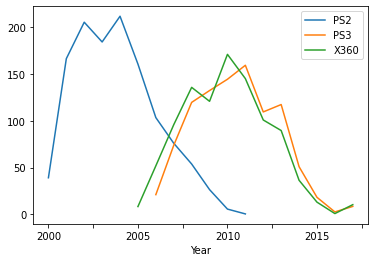

In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

%matplotlib inline

timeline_sales_pivot = timeline_sales \
    .groupBy("Year")\
    .pivot("Platform")\
    .agg(f.sum("Global_sales_Total"))

#display_df(timeline_sales_pivot)

timeline_sales_pivot.toPandas()\
    .set_index("Year").plot()

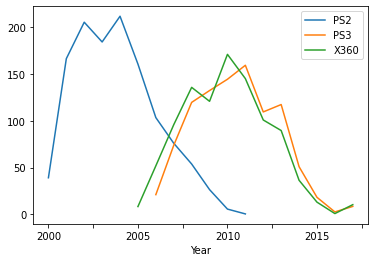

In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

#precisa ter o matplotlib
%matplotlib inline

timeline_sales_pivot = timeline_sales \
    .groupBy("Year")\
    .pivot("Platform")\
    .agg(f.sum("Global_sales_Total"))

#display_df(timeline_sales_pivot)

timeline_sales_pivot.toPandas()\
    .set_index("Year").plot()

#como plotar um gráfico de barras aqui?

# Exercícios - pt1

1)  Utilizando a API em Python do Spark (PySpark) retorne um novo dataframe contendo duas colunas: o nome do console (coluna Platform) e a contagem de jogos em cada plataforma no ano de 2010, ordenado pela contagem decrescentemente:

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
data_dir = '/content/drive/My Drive/Big Data/vgsales.csv'

In [ ]:
df = spark.read.load(data_dir, format="csv", header="true")

In [ ]:
import pyspark.sql.functions as f

In [ ]:
sales_count_2010 = df.select("Platform", "Global_Sales") \
    .filter(f.col("Year") == 2010) \
    .groupBy('Platform')\
    .agg(
        f.count("Global_sales").alias("Global_sales_TotalQuantity")
        )\
    .orderBy(f.desc('Global_sales_TotalQuantity'))

display_df(sales_count_2010)



,Platform,Global_sales_TotalQuantity
0,DS,326
1,Wii,254
2,PSP,188
3,X360,182
4,PS3,181
5,PC,90
6,PS2,38


2) Utilizando SQL, retorne o total arrecadado (coluna Global_Sales) por produtora (coluna Publisher) entre os anos 2000 e 2010 ordenado decrescentemente pelo total arrecadado

In [ ]:
#como filtrar em intervalos

df.createOrReplaceTempView("videogame_sales")

sales_publisher_upto2010 = spark.sql("""
    SELECT Publisher, 
        SUM(Global_Sales) AS Global_sales_Total
    FROM videogame_sales
    WHERE Year >= 2000 AND Year <=2010
    GROUP BY Publisher
    ORDER BY Global_sales_Total DESC
""")

display_df(sales_publisher_upto2010)


,Publisher,Global_sales_Total
0,Nintendo,944.96
1,Electronic Arts,728.87
2,Activision,444.84
3,Sony Computer Entertainment,346.10
4,Ubisoft,287.67
5,THQ,286.91
6,Take-Two Interactive,249.25
7,Konami Digital Entertainment,186.14
8,Sega,183.33
9,Microsoft Game Studios,165.89


3) Utilizando a API em Python do Spark (PySpark), escreva uma sequência de transformações que retorne um dataframe contendo o total das vendas Global_Sales por Publisher em cada ano compreendido entre 2000 e 2010:

In [ ]:
#como filtrar em intervalos

sales_total_upto2010 = df.select("Publisher", "Global_Sales",'Year')\
  .filter((f.col('Year')>=2000)&(f.col('Year')<=2010))\
  .groupBy('Publisher')\
  .pivot('Year')\
  .agg(f.sum('Global_Sales'))\
  .na.fill(0)

display_df(sales_total_upto2010)

,Publisher,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Media Rings,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,bitComposer Games,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00
2,Telegames,0.00,0.00,0.00,0.20,0.00,0.02,0.00,0.54,0.08,0.00,0.17
3,3DO,3.08,1.45,0.60,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Sting,0.00,0.00,0.00,0.00,0.10,0.00,0.03,0.11,0.38,0.00,0.03
5,Jack of All Games,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00
6,Game Life,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.17,0.00
7,IE Institute,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.17,0.04,0.00,0.00
8,Karin Entertainment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
9,Infogrames,1.66,2.12,8.46,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#correção do professor

#o pivot criar colunas com o item que você está avaliando

import pyspark.sql.functions as f
 
df4 = df.select("Publisher", "Year", "Global_Sales") \
    .filter((f.col("Year") >= 2000) & (f.col("Year") <= 2010)) \
    .groupBy("Publisher") \
    .pivot("Year") \
    .agg(f.sum("Global_Sales")) \
    .na.fill(0)
 
display_df(df4)



,Publisher,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Media Rings,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,bitComposer Games,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00
2,Telegames,0.00,0.00,0.00,0.20,0.00,0.02,0.00,0.54,0.08,0.00,0.17
3,3DO,3.08,1.45,0.60,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Sting,0.00,0.00,0.00,0.00,0.10,0.00,0.03,0.11,0.38,0.00,0.03
5,Jack of All Games,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00
6,Game Life,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.17,0.00
7,IE Institute,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.17,0.04,0.00,0.00
8,Karin Entertainment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
9,Infogrames,1.66,2.12,8.46,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Spark UDFs

UDF ou User Defined Functions são funções específicas definidas pelo usuário e disponíveis para uso em tempo de execução. Nelas, o usuário pode definir um comportamento aplicável a todo parâmetro passado a ela

## UDF simples
Aqui faremos a definição das nossas UDFs de dois modos. O primeiro é para ser utilizado com a API do Spark para Python. Já a segunda estará disponível para uso dentro do SparkSQL

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf

# Função Python para ser utilizada nos dataframes
def tax_collected(value):
    return float(value)*0.1

# Conversão da função em  UDF para uso em Pyspark API
tax_collected_udf = udf(tax_collected, DoubleType())

# Conversão da função em  UDF para uso em SparkSQL
spark.udf.register("tax_collected_udf_sql", tax_collected, DoubleType())

<function __main__.tax_collected>

**Pyspark API**

In [ ]:
display_df(
    df.select("Platform", "NA_Sales", tax_collected_udf("NA_Sales").alias("tax_collected"))\
    .limit(10)
)


,Platform,NA_Sales,tax_collected
0,Wii,41.49,4.149
1,NES,29.08,2.908
2,Wii,15.85,1.585
3,Wii,15.75,1.575
4,GB,11.27,1.127
5,GB,23.2,2.320
6,DS,11.38,1.138
7,Wii,14.03,1.403
8,Wii,14.59,1.459
9,NES,26.93,2.693


**Spark SQL**

In [ ]:
display_df(spark.sql("""
    SELECT Platform, 
    NA_Sales,
    tax_collected_udf_sql(NA_Sales) as tax_collected
    FROM videogame_sales
    LIMIT 10    
"""))

,Platform,NA_Sales,tax_collected
0,Wii,41.49,4.149
1,NES,29.08,2.908
2,Wii,15.85,1.585
3,Wii,15.75,1.575
4,GB,11.27,1.127
5,GB,23.2,2.320
6,DS,11.38,1.138
7,Wii,14.03,1.403
8,Wii,14.59,1.459
9,NES,26.93,2.693


## UDF com objetos externos
É possível criar UDFs com objetos Python, de modo que possam ser usados de forma paralela pelo cluster de Spark

In [ ]:
import hashlib
from pyspark.sql.types import StringType

def generate_hash(value):
    hash_object = hashlib.md5(bytes(value, 'utf8'))
    return hash_object.hexdigest()

# Uso em SparkSQL
spark.udf.register("generate_hash_sql", generate_hash, StringType())

<function __main__.generate_hash>

In [ ]:
display_df(spark.sql("""
    SELECT Platform, 
    generate_hash_sql(Platform) as Platform_handle
    FROM videogame_sales
    LIMIT 10
"""))

#a função hash é codificar

,Platform,Platform_handle
0,Wii,43ff8bb2e8b00bf31fbb6df52df6b328
1,NES,8d93d9819942f8e443fdde4fc2d67bc2
2,Wii,43ff8bb2e8b00bf31fbb6df52df6b328
3,Wii,43ff8bb2e8b00bf31fbb6df52df6b328
4,GB,79cba1185463850dedba31f172f1dc5b
5,GB,79cba1185463850dedba31f172f1dc5b
6,DS,47b79bd259e22596ffc4be2ffbbe5c5a
7,Wii,43ff8bb2e8b00bf31fbb6df52df6b328
8,Wii,43ff8bb2e8b00bf31fbb6df52df6b328
9,NES,8d93d9819942f8e443fdde4fc2d67bc2


# Joins entre Dataframes Spark
Frequentemente, ao lidar com analise de dados utilizando o Spark ou na criação de pipelines de transformação de dados, é comum realizar a junção de diferentes bases de dados de forma a ter o dado o mais completo o possível disponível para o cientista de dados. Esse conceito é contrário ao conceito de "Normalização" nos tradicionais bancos de dados, conhecido como "Desnormalização".

**Preparando os datasets**

In [ ]:
values_a = [('Pirate',1),('Monkey',2),('Ninja',3),('Spaghetti',4)]
table_a = spark.createDataFrame(values_a,['name','id'])
 
values_b = [('Rutabaga',1),('Pirate',2),('Ninja',3),('Darth Vader',4)]
table_b = spark.createDataFrame(values_b,['name','id'])

display_df(table_a)
#display_df(table_b)

,name,id
0,Pirate,1
1,Monkey,2
2,Ninja,3
3,Spaghetti,4


**Inner Join**

In [ ]:
inner_join = table_a.join(table_b, table_a.name == table_b.name)
display_df(inner_join)

,name,id,name,id
0,Ninja,3,Ninja,3
1,Pirate,1,Pirate,2


**Left Join**

In [ ]:
left_join = table_a.join(table_b, table_a.name == table_b.name, how="left") # também pode ser usado o 'left_outer'
display_df(left_join)

,name,id,name,id
0,Spaghetti,4,None,NaN
1,Ninja,3,Ninja,3.0
2,Pirate,1,Pirate,2.0
3,Monkey,2,None,NaN


**Right Join**

In [ ]:
right_join = table_a.join(table_b, table_a.name == table_b.name, how="right") # também pode ser usado o 'right_outer'
display_df(right_join)

,name,id,name,id
0,None,NaN,Rutabaga,1
1,Ninja,3.0,Ninja,3
2,Pirate,1.0,Pirate,2
3,None,NaN,Darth Vader,4


**Cross join ou produto cartesiano**

In [ ]:
cross_join = table_a.crossJoin(table_b.select("name"))
display_df(cross_join)

,name,id,name
0,Pirate,1,Rutabaga
1,Pirate,1,Pirate
2,Monkey,2,Rutabaga
3,Monkey,2,Pirate
4,Pirate,1,Ninja
5,Pirate,1,Darth Vader
6,Monkey,2,Ninja
7,Monkey,2,Darth Vader
8,Ninja,3,Rutabaga
9,Ninja,3,Pirate


# Exercícios - pt2

4) Utilizando o dataset vgsales, crie uma UDF que cálcule o século em que o jogo foi lançado:

In [ ]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

In [ ]:
# testando a formula

def calcula_seculo(value):
  last_first_two_digits = value[0:2]

  if value[2:4] == '00':
    return int(last_first_two_digits)
  else:
    return int(last_first_two_digits)+1


# Conversão da função em  UDF para uso em Pyspark API
calcula_seculo_udf = udf(calcula_seculo, IntegerType())

In [ ]:
df.select(calcula_seculo_udf('Year').alias('Século de lançamento'),'Name','Year').show()

+--------------------+--------------------+----+
|Século de lançamento|                Name|Year|
+--------------------+--------------------+----+
|                  21|          Wii Sports|2006|
|                  20|   Super Mario Bros.|1985|
|                  21|      Mario Kart Wii|2008|
|                  21|   Wii Sports Resort|2009|
|                  20|Pokemon Red/Pokem...|1996|
|                  20|              Tetris|1989|
|                  21|New Super Mario B...|2006|
|                  21|            Wii Play|2006|
|                  21|New Super Mario B...|2009|
|                  20|           Duck Hunt|1984|
|                  21|          Nintendogs|2005|
|                  21|       Mario Kart DS|2005|
|                  20|Pokemon Gold/Poke...|1999|
|                  21|             Wii Fit|2007|
|                  21|        Wii Fit Plus|2009|
|                  21|  Kinect Adventures!|2010|
|                  21|  Grand Theft Auto V|2013|
|                  2

In [ ]:
# Função Python para ser utilizada nos dataframes

def calcula_seculo(value):
  last_first_two_digits = value[0:2]
  return int(last_first_two_digits)+1


# Conversão da função em  UDF para uso em Pyspark API
calcula_seculo_udf = udf(calcula_seculo, IntegerType())



In [ ]:

display_df(
    df.select("Name", "Year", calcula_seculo_udf("Year").alias("Século_Lançamento")) \
    .limit(10)
)


,Name,Year,Século_Lançamento
0,Wii Sports,2006,21
1,Super Mario Bros.,1985,20
2,Mario Kart Wii,2008,21
3,Wii Sports Resort,2009,21
4,Pokemon Red/Pokemon Blue,1996,20
5,Tetris,1989,20
6,New Super Mario Bros.,2006,21
7,Wii Play,2006,21
8,New Super Mario Bros. Wii,2009,21
9,Duck Hunt,1984,20


5) Utilizando os datasets do código abaixo:

In [ ]:
employees = [('Joao',1),('Marcos',2),('Tiago',3),('Pedro',4), ('Maria',5), ('Marta',6)]
employees_df = spark.createDataFrame(employees,['name','id'])
 
deptos = [('Administrativo',1),('Financeiro',2),('Financeiro',3),('Financeiro',5),('TI',5),('TI',6)]
deptos_df = spark.createDataFrame(deptos,['dep_name','emp_id'])


display_df(employees_df)

,name,id
0,Joao,1
1,Marcos,2
2,Tiago,3
3,Pedro,4
4,Maria,5
5,Marta,6


In [ ]:
display_df(deptos_df)

,dep_name,emp_id
0,Administrativo,1
1,Financeiro,2
2,Financeiro,3
3,Financeiro,5
4,TI,5
5,TI,6


Retorne a lista de empregados (employees) e a lista de departamentos (deptos), retorne uma lista de todos os empregados que estão em um departamento:

In [ ]:
inner_join = employees_df.join(deptos_df,employees_df.id==deptos_df.emp_id)
display_df(inner_join)

,name,id,dep_name,emp_id
0,Marta,6,TI,6
1,Maria,5,Financeiro,5
2,Maria,5,TI,5
3,Joao,1,Administrativo,1
4,Tiago,3,Financeiro,3
5,Marcos,2,Financeiro,2


In [ ]:
inner_join = deptos_df.join(employees_df,employees_df.id==deptos_df.emp_id)
display_df(inner_join)

,dep_name,emp_id,name,id
0,TI,6,Marta,6
1,Financeiro,5,Maria,5
2,TI,5,Maria,5
3,Administrativo,1,Joao,1
4,Financeiro,3,Tiago,3
5,Financeiro,2,Marcos,2


# Aula 3 - Output e Persistência dos Dataframes

# Output e Persistência dos Dataframes
Nessa aula, estaremos cobrindo as mais populares formas de se realizar output e persistência nos Dataframes do Spark bem como os modos de inserção suportados pelo mesmo

### Carregando o dataset videogamesales
Dataset a ser utilizado: https://www.kaggle.com/gregorut/videogamesales/data

In [ ]:
data_dir = "vgsales.csv"

#### Lendo os dados

In [ ]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")

In [ ]:
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



# Output / Ações
Output ou ações são o que delimitam um Job, que por sua vez, consiste em um conjunto de transformações em um Dataframe encadeadas e tendo sempre na ponta uma ação final. **Algumas ações são passíveis de serem realizadas de forma distribuída nos executores, mas outras, em decorrência de sua natureza, exige a centralização dos dados na entidade coordenadora chamada driver**. Basicamente:
1. Toda ação realizada para persistir o Dataframe **pode** ser realizada de forma distribuída direto pelos executores
2. Toda ação realizada para trazer Dataframes Spark para estruturas de dados em Python **exigirá a concentração dos dados no driver**

# Lazy evaluation
Em conjunto com o conceito das **Ações**, temos também o conceito adotado pelo Spark e outras ferramentas de Big Data: **Lazy Evaluation**. É um conceito que define que **todas as transformações encadeadas só serão executadas quando houver uma ação**. Por exemplo, veja o trecho abaixo:
```python
df2 = df.select("col1", "col2") \
    .filter(f.col("col2") < 10) \
    .groupBy("col1") \
    .agg(f.sum("col2"))
```

Podemos notar 3 transformações: (1) *select*, (2) *filter* e (3) *groupBy + agg*. Nesse momento, é possível notar que nenhuma das transformações até então foram executadas devido ao conceito da *Lazy Evaluation* (outras ferramentas de Big Data também utilizam essa metodologia), ou seja, as transformações só serão de fato executadas quando houver uma ação. Como ainda não executamos nenhuma, as computações ainda não ocorrem de imediato, conforme visto na [Spark UI](192.168.1.7:8080).

A computação somente ocorrerá ao executarmos os trechos abaixo:
```python
df2.show()
df2.collect()
```

Lazy evaluation é interessante porque permite ao Spark, escolher em tempo de execução o melhor plano a ser seguido, com as otimizações passíveis de serem aplicadas em cada caso, dado as transformações utilizadas pelo programador

### Output simples

##### Printando Dataframes

In [ ]:
df.show(5)

+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing| Nintendo|   11.27|    8.89|   10.22|        1.0|       31.37|
+----+--------------------+--------+----+------------+---------+

##### Convertendo todo o Dataframe Spark para estruturas em Python puro
Obs.: Cuidado!! Esses comandos podem resultar em falta de memoria no processo driver caso o Dataframe seja muito grande. É recomendado utilizá-lo apenas com Dataframes pequenos

In [ ]:
#df.limit(10).collect() # converte o dataframe para uma lista em Python
#df.limit(10).toPandas() # converte o dataframe Spark para um dataframe Pandas
#df.limit(10).first() # retorna a primeira linha do Dataframe Spark como uma lista em Python

##### Contando o número de linhas

In [ ]:
df.count()

16598

### Output no formato de persistência como uma tabela relacional
O Spark, além de ser uma engine de processamento paralelo, possui também um catálogo de dados onde é possível persistir informações de tabelas e utilizar a API do Spark SQL para consultá-las. Para interagir com esse catálogo de dados do Spark, temos duas formas:
- Criando tabelas temporárias: `createOrReplaceTempView()`
- Criando tabelas definitivas: `df.write.saveAsTable()`

In [ ]:
df.createOrReplaceTempView("temp_vgsales")
df.write.saveAsTable("stored_vgsales_1")

#### Visualizando as tabelas criadas

In [ ]:
spark.sql("SHOW TABLES").show()

+--------+----------------+-----------+
|database|       tableName|isTemporary|
+--------+----------------+-----------+
| default|stored_vgsales_1|      false|
|        |    temp_vgsales|       true|
|        | videogame_sales|       true|
+--------+----------------+-----------+



In [ ]:
spark.sql("""
SELECT * FROM stored_vgsales_1 LIMIT 10
""").show()

+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing| Nintendo|   11.27|    8.89|   10.22|        1.0|       31.37|
|   6|              Tetris|      GB|1989|      Puzzle| Nintendo|

### Output no formato de persistência em arquivos
Ao persistir dataframes em arquivos, o Spark oferece uma gama de possíveis arquivos de saída. Entretando, é necessário ficar atento a alguns pontos sobre os arquivos gerados.

1. Para todo output de arquivo gerado, será criado um diretório com o nome escolhido e dentro dele, haverá um ou mais arquivos `part-0000...` contendo os dados propriamente ditos, bem como um arquivo `_SUCCESS` (flag indicando a finalização do processo de persistência do dado)
2. É possível controlar a quantidade de partições do arquivo final com o comando `df.coalesce()` ou `df.repartition()`
3. Existem 2 modos de realizar o processo de persistência do dado `overwrite` e `append`

#### Persistência em arquivo CSV - 1 partição

In [ ]:
# .coalesce(1) - move os dados internamente para UMA partição apenas
# .mode("overwrite") - substitui o diretório inteiro caso seja executado novamente
# .option("header", "true") - incluir o cabeçalho no CSV (específica do formato CSV)

df.coalesce(1)\
    .write\
    .mode("overwrite")\
    .option("header", "true")\
    .csv("./output/vgsales_csv")

In [ ]:
!ls output/vgsales_csv

part-00000-a59c25fe-86e5-4e25-a15a-e193e139d686-c000.csv  _SUCCESS


In [ ]:
!head -n 5 output/vgsales_csv/part-00000-9c3a12b7-372c-423a-ac8a-b79ff389d4f2-c000.csv

head: cannot open 'output/vgsales_csv/part-00000-9c3a12b7-372c-423a-ac8a-b79ff389d4f2-c000.csv' for reading: No such file or directory


#### Persistência em arquivo CSV - 2 partições

In [ ]:
# .repartition(2) - salva o dataframe utilizando 2 partições

df.repartition(2)\
    .write\
    .mode("overwrite")\
    .option("header", "true")\
    .csv("./output/vgsales_csv")

In [ ]:
!ls output/vgsales_csv

part-00000-8f90ee08-5108-433e-b156-61e9a4686c0d-c000.csv  _SUCCESS
part-00001-8f90ee08-5108-433e-b156-61e9a4686c0d-c000.csv


#### Persistência em arquivo CSV - 2 partições e modo 'append'

In [ ]:
# .mode("append") - realiza a operação de append ao salvar no mesmo diretório

df.repartition(2)\
    .write\
    .mode("append")\
    .option("header", "true")\
    .csv("./output/vgsales_csv")

In [ ]:
!ls output/vgsales_csv

part-00000-45ea6161-8d31-42cb-bdc7-8f49cef2a04d-c000.csv
part-00000-8f90ee08-5108-433e-b156-61e9a4686c0d-c000.csv
part-00001-45ea6161-8d31-42cb-bdc7-8f49cef2a04d-c000.csv
part-00001-8f90ee08-5108-433e-b156-61e9a4686c0d-c000.csv
_SUCCESS


Lendo o dataset particionado

In [ ]:
spark.read.load("output/vgsales_csv", format="csv", inferSchema="true", header="true") \
  .show()

+-----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
| Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+-----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|12862|   Murder, She Wrote|      PC|2009|   Adventure|Focus Home Intera...|     0.0|    0.04|     0.0|       0.01|        0.05|
| 4507|       Trials Fusion|     PS4|2014|      Racing|             Ubisoft|    0.13|    0.21|    0.01|       0.08|        0.43|
|10480|Corvette Evolutio...|      DS|2008|      Racing|    Black Bean Games|     0.1|     0.0|     0.0|       0.01|         0.1|
| 7644|          The BIGS 2|     PS2|2009|      Sports|Take-Two Interactive|     0.1|    0.08|     0.0|       0.03|         0.2|
|11122|Data East Arcade ...|     Wii|2010|        Misc|Majesco Entertain...|    0.08|     0.0|   

#### Persistência em arquivo JSON

In [ ]:
df.repartition(2)\
    .write\
    .mode("overwrite")\
    .json("./output/vgsales_json")

In [ ]:
!ls output/vgsales_json

part-00000-d95b8c1c-2a08-48b2-a6c5-d8d5adcdead9-c000.json  _SUCCESS
part-00001-d95b8c1c-2a08-48b2-a6c5-d8d5adcdead9-c000.json


In [ ]:
!head -n 5 output/vgsales_json/part-00000-0f205f75-4b8b-4b0d-b6d0-4558bb531a5f-c000.json

head: cannot open 'output/vgsales_json/part-00000-0f205f75-4b8b-4b0d-b6d0-4558bb531a5f-c000.json' for reading: No such file or directory


#### Persistência em arquivo Parquet

In [ ]:
df.coalesce(1)\
    .write\
    .mode("overwrite")\
    .parquet("./output/vgsales_parquet")

In [ ]:
!ls output/vgsales_parquet

part-00000-e77df995-b223-411f-91c0-d6a6a4888b41-c000.snappy.parquet  _SUCCESS


In [ ]:
file://output/vgsales/
s3://output/vgsales/
hdfs://output/vgsales/

### Observações
Além de possuir uma gama de formatos de entrada e saída de dados, o Spark também consegue ler e salvar esses dados das mais variadas fontes. Podemos citar algumas tais quais:
- Brokers como Kafka, MQTT, AWS Kinesis, etc
- Bancos de dados relacionais: MySQL, SQL Server, etc
- Cloud storages como S3, ADLS, Blob Storage
- Hadoop Distributed File System (HDFS)
- Bancos de dados NoSQL: Redis, HBase, Cassandra, MongoDB, Elasticsearch, timeseries DB, etc

# Exercícios

1) Exporte o dataframe vgsales em formato JSON, com 4 partições em modo overwrite ativado no caminho ./output/vgsales_json:


In [ ]:
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [ ]:
df.count()

16598

In [ ]:
df.createOrReplaceTempView("temp_vgsales")
df.write.saveAsTable("stored_vgsales")

In [ ]:
df.repartition(4)\
    .write\
    .mode("overwrite")\
    .option("header", "true")\
    .json("./output/vgsales_json")

2) Exporte o dataframe vgsales em formato CSV, com 2 partições tradicionais, e uma partição por coluna no campo Year.

In [ ]:
df.selectExpr('Year as launched_year', '*').repartition(2)\
    .write\
    .partitionBy("launched_year") \
    .mode("overwrite")\
    .option("header", "true")\
    .csv("./output/vgsales_csv")

In [ ]:
#versão do professor

df.selectExpr("replace(Year, '/', '') as year_partition", "*") \
    .repartition(2)\
    .write\
    .partitionBy("year_partition") \
    .mode("overwrite")\
    .option("header", "true")\
    .csv("./output/vgsales_csv")

# Aula 4 - Introdução aos RDDs

### RDD
RDD ou Resilient Distributed Datasets são estruturas distribuídas e imutáveis de objetos Python, Scala, Java ou qualquer que seja a linguagem que o usuário esteja operando os RDDs. Ao contrário dos Dataframes que são estruturados no conceito de Row com um schema conhecido, os RDDs são genéricos deixando a cargo do programador o seu uso e a sua estruturação

### Low-level APIs
São APIs baixo nível fornecidas pelo Spark para manipular as estruturas elementares do Spark: os **RDDs**, **Shared Variables** e **Accumulators**. Normalmente o usuário opta por usar as Low-level APIs em 3 situações:
- Quando é necessário ter o controle explícito de como o dado é distribuído ao longo do cluster
- Manter código legado escrito usando RDDs
- Acessar variáveis compartilhadas no cluster como um todo

Mesmo que você seja avançado em programação com RDDs, é recomendado que você siga utilizando as APIs High-level, a menos que se depare com uma das 3 situações acima. Ao utilizar os RDDs, assume-se que todo o controle está na mão do usuário e este pode não saber ao certo o que está fazendo e danificar a performance da aplicação.

É importante ressaltar que a API High-level Dataframe é inteiramente baseada nos RDDs, ou seja, toda transformação realizada em cima dos Dataframes, se torna uma transformação primitiva em RDD e entender como funciona essas APIs pode fazer a diferença na construção de aplicações com mais performance e robustez.

### Spark Context
É o ponto de entrada para se trabalhar com as Low-level APIs. Está para os RDDs assim como o Spark Session está para os Dataframes

# Introdução aos RDDs
Nessa aula veremos o que são os RDDs ou Resilient Distributed Datasets e como interagir com algumas operações básicas sobre os mesmos

In [ ]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

### Criando RDDs
Ao criar um RDD, é possível criá-lo de 3 formas: 
- a partir de coleções locais em Python
- a partir de data sources primitivas
- a partir de Dataframes

##### Utilizando coleções locais
Ao utilizar coleções locais, temos o comando `sc.parallelize()` que recebe como parâmetro a **coleção** e o número de **partições**

Criando a partir de locais

In [ ]:
text = "Spark The Definitive Guide : Big Data Processing Made Simple"
collection = text.split(" ")

In [ ]:
type(collection)

list

In [ ]:
rdd_words = sc.parallelize(collection, 2)
rdd_words.setName("myWords")
rdd_words

In [ ]:
rdd_words.collect()

NameError: ignored

Outro Exemplo

In [ ]:
data_dict = [{
    "nome":"Jose",
    "idade": 52,
    "profissao": "Advogado"
},{
    "nome":"Maria",
    "idade": 35,
    "profissao": "Médico",
    "sexo": "feminino"
},{
    "nome":"Pedro",
    "idade": 25,
    "profissao": "Estudante"
},
print,
True]

data_dict

[{'idade': 52, 'nome': 'Jose', 'profissao': 'Advogado'},
 {'idade': 35, 'nome': 'Maria', 'profissao': 'Médico', 'sexo': 'feminino'},
 {'idade': 25, 'nome': 'Pedro', 'profissao': 'Estudante'},
 <function print>,
 True]

In [ ]:
rdd_dict = sc.parallelize(data_dict, 2)
rdd_dict.collect()

[{'idade': 52, 'nome': 'Jose', 'profissao': 'Advogado'},
 {'idade': 35, 'nome': 'Maria', 'profissao': 'Médico', 'sexo': 'feminino'},
 {'idade': 25, 'nome': 'Pedro', 'profissao': 'Estudante'},
 <function print>,
 True]

##### Utilizando arquivos como data source
Ao utilizar arquivos de texto, cada linha do arquivo será uma linha do RDD.

In [ ]:
data_dir = "vgsales.csv"

rdd = sc.textFile(data_dir)
rdd.setName("vgsales_csv")

vgsales_csv MapPartitionsRDD[521] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
rdd.take(10)

['Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales',
 '1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74',
 '2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24',
 '3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82',
 '4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33',
 '5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37',
 '6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26',
 '7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01',
 '8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02',
 '9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62']

### Interoperabilidade entre Dataframes e RDDs
As APIs do Spark fornecem métodos para realizar a conversão de Dataframes em RDDs e vice versa. Para isso, temos dois métodos importantes: `rdd` e `toDF()`

##### Convertendo um Dataframe para um RDD

In [ ]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")

In [ ]:
df.rdd.take(5)

[Row(Rank=1, Name='Wii Sports', Platform='Wii', Year='2006', Genre='Sports', Publisher='Nintendo', NA_Sales=41.49, EU_Sales=29.02, JP_Sales=3.77, Other_Sales=8.46, Global_Sales=82.74),
 Row(Rank=2, Name='Super Mario Bros.', Platform='NES', Year='1985', Genre='Platform', Publisher='Nintendo', NA_Sales=29.08, EU_Sales=3.58, JP_Sales=6.81, Other_Sales=0.77, Global_Sales=40.24),
 Row(Rank=3, Name='Mario Kart Wii', Platform='Wii', Year='2008', Genre='Racing', Publisher='Nintendo', NA_Sales=15.85, EU_Sales=12.88, JP_Sales=3.79, Other_Sales=3.31, Global_Sales=35.82),
 Row(Rank=4, Name='Wii Sports Resort', Platform='Wii', Year='2009', Genre='Sports', Publisher='Nintendo', NA_Sales=15.75, EU_Sales=11.01, JP_Sales=3.28, Other_Sales=2.96, Global_Sales=33.0),
 Row(Rank=5, Name='Pokemon Red/Pokemon Blue', Platform='GB', Year='1996', Genre='Role-Playing', Publisher='Nintendo', NA_Sales=11.27, EU_Sales=8.89, JP_Sales=10.22, Other_Sales=1.0, Global_Sales=31.37)]

##### Convertendo um RDD para um Dataframe

In [ ]:
rdd = sc.textFile(data_dir)
rdd

vgsales.csv MapPartitionsRDD[540] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
rdd \
    .map(lambda x: (x,)) \
    .toDF() \
    .show()

+--------------------+
|                  _1|
+--------------------+
|Rank,Name,Platfor...|
|1,Wii Sports,Wii,...|
|2,Super Mario Bro...|
|3,Mario Kart Wii,...|
|4,Wii Sports Reso...|
|5,Pokemon Red/Pok...|
|6,Tetris,GB,1989,...|
|7,New Super Mario...|
|8,Wii Play,Wii,20...|
|9,New Super Mario...|
|10,Duck Hunt,NES,...|
|11,Nintendogs,DS,...|
|12,Mario Kart DS,...|
|13,Pokemon Gold/P...|
|14,Wii Fit,Wii,20...|
|15,Wii Fit Plus,W...|
|16,Kinect Adventu...|
|17,Grand Theft Au...|
|18,Grand Theft Au...|
|19,Super Mario Wo...|
+--------------------+
only showing top 20 rows



Outro exemplo

In [ ]:
data_dict = [{
    "nome":"Jose",
    "idade": 52,
    "profissao": "Advogado",
    "sexo": 1
},{
    "nome":"Maria",
    "idade": 35,
    "profissao": "Médico",
    "sexo": "feminino"
},{
    "nome":"Pedro",
    "idade": 25,
    "profissao": "Estudante"
}]

data_dict

[{'idade': 52, 'nome': 'Jose', 'profissao': 'Advogado', 'sexo': 1},
 {'idade': 35, 'nome': 'Maria', 'profissao': 'Médico', 'sexo': 'feminino'},
 {'idade': 25, 'nome': 'Pedro', 'profissao': 'Estudante'}]

In [ ]:
rdd = sc.parallelize(data_dict)
rdd.collect()

[{'idade': 52, 'nome': 'Jose', 'profissao': 'Advogado', 'sexo': 1},
 {'idade': 35, 'nome': 'Maria', 'profissao': 'Médico', 'sexo': 'feminino'},
 {'idade': 25, 'nome': 'Pedro', 'profissao': 'Estudante'}]

In [ ]:
rdd.toDF().show()

/usr/local/lib/python3.6/dist-packages/pyspark/sql/session.py:401: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


+-----+-----+---------+----+
|idade| nome|profissao|sexo|
+-----+-----+---------+----+
|   52| Jose| Advogado|   1|
|   35|Maria|   Médico|null|
|   25|Pedro|Estudante|null|
+-----+-----+---------+----+



# Aula 5 - Transformações com RDDs

# Transformações com RDDs
Nessa aula veremos algumas das mais comuns transformações utilizanod RDDs. Lembrando que todas as transformações High-level realizadas em dataframes são convertidas em transformações low-level utilizando os RDDs.

In [ ]:
sc = spark.sparkContext

### Coleção a ser utilizada
Durante essa parte do curso, veremos como aplicar os comandos utilizando a seguinte coleção em Python (texto extraído da seção Overwiew em http://spark.apache.org/docs/latest/rdd-programming-guide.html#overview

In [ ]:
text = "At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures. A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the function to each task. Sometimes, a variable needs to be shared across tasks, or between tasks and the driver program. Spark supports two types of shared variables: broadcast variables, which can be used to cache a value in memory on all nodes, and accumulators, which are variables that are only added to, such as counters and sums"
words = text.split(" ")

### Criando o RDD

In [ ]:
# Look for the core number
#o número é em quantos cores vc está dividindo
rdd = sc.parallelize(words, 4)
rdd.setName("myWords")

myWords ParallelCollectionRDD[556] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
rdd.take(10)

['At',
 'a',
 'high',
 'level,',
 'every',
 'Spark',
 'application',
 'consists',
 'of',
 'a']

### Transformações
##### rdd.map()
Assumindo que temos:
```python
rdd2 = rdd1.map(<FUNCAO>)
```
A transformação `map()` irá mapear cada linha de `rdd1` em uma linha em `rdd2`

In [ ]:
''''
Cada linha do rdd irá ser mapeada para uma nova linha contendo 
a palavra, o tamanho da palavra e se começa com a letra 'S'
'''
def starts_with_S(word):
    return word.startswith("S")

new_rdd = rdd.map(lambda word: (word, len(word), starts_with_S(word)))

In [ ]:
new_rdd.take(20)

[('At', 2, False),
 ('a', 1, False),
 ('high', 4, False),
 ('level,', 6, False),
 ('every', 5, False),
 ('Spark', 5, True),
 ('application', 11, False),
 ('consists', 8, False),
 ('of', 2, False),
 ('a', 1, False),
 ('driver', 6, False),
 ('program', 7, False),
 ('that', 4, False),
 ('runs', 4, False),
 ('the', 3, False),
 ('user’s', 6, False),
 ('main', 4, False),
 ('function', 8, False),
 ('and', 3, False),
 ('executes', 8, False)]

##### rdd.filter()
Assumindo que temos:
```python
rdd2 = rdd1.filter(<FUNCAO>)
```
A transformação `filter()` irá remover linhas que resultem em `False` quando aplicadas à `<FUNCAO>`

In [ ]:
''''
Todas as linhas cuja posição 2 seja False serão removidas
'''
filtered_rdd = new_rdd.filter(lambda row: row[2]) # ou row[2] == True

In [ ]:
filtered_rdd.take(10)

[('Spark', 5, True),
 ('Spark', 5, True),
 ('Scala', 5, True),
 ('Spark', 5, True),
 ('Spark', 5, True),
 ('Spark', 5, True),
 ('Sometimes,', 10, True),
 ('Spark', 5, True)]

##### rdd.flatMap()
Assumindo que temos:
```python
rdd2 = rdd1.flatMap(<FUNCAO>)
```
A transformação `flatMap()` irá mapear cada linha de `rdd1` em uma ou mais linhas em `rdd2`

In [ ]:
list("igor")

['i', 'g', 'o', 'r']

In [ ]:
''''
Todas as palavras do rdd filtrado serão convertidas em um RDD contendo apenas
letras
'''

flatted_rdd = filtered_rdd.flatMap(lambda row: list(row[0]))

In [ ]:
flatted_rdd.take(20)

['S',
 'p',
 'a',
 'r',
 'k',
 'S',
 'p',
 'a',
 'r',
 'k',
 'S',
 'c',
 'a',
 'l',
 'a',
 'S',
 'p',
 'a',
 'r',
 'k']

##### rdd.distinct()
Assumindo que temos:
```python
rdd2 = rdd1.distinct()
```
A transformação `distinct()` irá gerar um novo rdd com apenas objetos distintos

In [ ]:
''''
Obteremos a lista de palavras únicas na frase
'''

distinct_rdd = rdd.distinct()

In [ ]:
distinct_rdd.take(10)

['At',
 'of',
 'operations',
 'provides',
 'in',
 'are',
 'other',
 'Hadoop-supported',
 'an',
 'may']

In [ ]:
distinct_rdd.count()
#rdd.count()

124

##### rdd.sortBy()
Assumindo que temos:
```python
rdd2 = rdd1.sortBy(<FUNCAO>)
```
A transformação `sortBy()` irá ordenar as linhas do rdd1 conforme critério definido na `<FUNCAO>`

In [ ]:
''''
Todas as palavras do rdd serão ordenadas conforme o tamanho da palavra
'''

sorted_distinct_rdd = distinct_rdd.sortBy(lambda word: len(word) * -1) # -1 significa order reversa

In [ ]:
sorted_distinct_rdd.take(20)

['Hadoop-supported',
 'accumulators,',
 'automatically',
 'transforming',
 'operations.',
 'partitioned',
 'application',
 'abstraction',
 'distributed',
 'efficiently',
 'operations',
 'variables,',
 'Sometimes,',
 'variables:',
 'collection',
 'failures.',
 'different',
 'broadcast',
 'resilient',
 'parallel.']

### Pair RDDs
Alguns RDDs específicos no Spark permitem a aplicação de transformações de modo mais eficiente. Estes são chamados de PairRDDs porque se apresentam na forma de um rdd key-value, ou seja, (K,V). As transformações disponíveis para serem aplicadas nos PairRDDs normalmente segue o padrão `<some-operation>ByKey`

##### Criando um PairRDD

In [ ]:
rdd


myWords ParallelCollectionRDD[556] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
pair_rdd = rdd.map(lambda x: (x, 1))
pair_rdd.take(10)

[('At', 1),
 ('a', 1),
 ('high', 1),
 ('level,', 1),
 ('every', 1),
 ('Spark', 1),
 ('application', 1),
 ('consists', 1),
 ('of', 1),
 ('a', 1)]

##### Criando um PairRDD utilizanod o keyBy
É uma transformação que cria um PairRDD passando-se uma função para retornar qual será a key

In [ ]:
rdd.take(5)

['At', 'a', 'high', 'level,', 'every']

In [ ]:
key_by_pair_rdd = rdd.keyBy(lambda x: x[0].lower())

In [ ]:
key_by_pair_rdd.take(10)

[('a', 'At'),
 ('a', 'a'),
 ('h', 'high'),
 ('l', 'level,'),
 ('e', 'every'),
 ('s', 'Spark'),
 ('a', 'application'),
 ('c', 'consists'),
 ('o', 'of'),
 ('a', 'a')]

##### rdd.mapValues()
Assumindo que temos:
```python
rdd2 = rdd1.mapValues(<FUNCAO>)
```
Transformação aplicada somente no valor de um PairRDD, aplicando uma `<FUNCAO>` e transformando cada linha do rdd1 em outra linha no rdd2

In [ ]:
letters = key_by_pair_rdd.mapValues(lambda x: 1)
letters.take(5)

[('a', 1), ('a', 1), ('h', 1), ('l', 1), ('e', 1)]

##### rdd.reduceByKey
Realiza uma operação de reduce em um PairRDD baseado em seus valores agrupando por key

In [ ]:
#'At'
#(1, 1, 1, 1, 1, 1, 1)
#(2, 1, 1, 1, 1, 1)
#(3, 1, 1, 1, 1)
#(4, 1, 1, 1)


# Realizando a contagem das palavras
reduced_pair_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)
reduced_pair_rdd.take(10)

[('At', 1),
 ('of', 6),
 ('operations', 1),
 ('provides', 1),
 ('in', 9),
 ('are', 3),
 ('other', 1),
 ('Hadoop-supported', 1),
 ('an', 2),
 ('may', 1)]

In [ ]:
# Realizando a contagem que palavras que começam com as letras do alfabeto
reduced_letters = letters.reduceByKey(lambda a, b: a + b)
reduced_letters.take(10)

[('l', 1),
 ('s', 20),
 ('c', 12),
 ('p', 11),
 ('r', 8),
 ('i', 15),
 ('b', 9),
 ('a', 39),
 ('e', 7),
 ('m', 5)]

In [ ]:
letters \
  .mapValues(lambda x: "S") \
  .reduceByKey(lambda a, b: a + b) \
  .take(5)

[('l', 'S'),
 ('s', 'SSSSSSSSSSSSSSSSSSSS'),
 ('c', 'SSSSSSSSSSSS'),
 ('p', 'SSSSSSSSSSS'),
 ('r', 'SSSSSSSS')]

##### rdd.sortByKey
Realiza uma operação de sort em um PairRDD baseado em sua key

In [ ]:
sorted_reduced_rdd = reduced_pair_rdd.sortByKey(ascending=False)
sorted_reduced_rdd.take(10)

[('with', 1),
 ('which', 3),
 ('when', 1),
 ('various', 1),
 ('variables:', 1),
 ('variables,', 1),
 ('variables', 2),
 ('variable', 2),
 ('value', 1),
 ('user’s', 1)]

In [ ]:
sorted_reduced_letters = reduced_letters.sortByKey(ascending=False)
sorted_reduced_letters.take(10)

[('w', 5),
 ('v', 8),
 ('u', 5),
 ('t', 25),
 ('s', 20),
 ('r', 8),
 ('p', 11),
 ('o', 18),
 ('n', 5),
 ('m', 5)]

##### rdd.join()
Transformação responsável por realizar a junção entre dois dataframes. Estando ambos os rdds na forma de um PairRDD, para executar o `.join()`, basta rodar o código abaixo:
```python
joinned_rdd = rdd1.join(rdd2)
```

O comando `.join()`por si só executa o conceito do `innerJoin`. Existem também os demais tipos: `fullOuterJoin`, `leftOuterJoin`, `rightOuterJoin` e `cartesian`.

Veja mais

É possível encontrar uma lista de todas as transformações disponíveis para uso nos RDDs na API do Spark: http://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations

# Exercícios
Para iniciar os exercícios, execute o paragrafo abaixo para que o nosso dataset words esteja disponível para ser utilizado:

In [ ]:
text = "At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures. A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the function to each task. Sometimes, a variable needs to be shared across tasks, or between tasks and the driver program. Spark supports two types of shared variables: broadcast variables, which can be used to cache a value in memory on all nodes, and accumulators, which are variables that are only added to, such as counters and sums"
words = text.split(" ")

Para auxiliar na visualização dos resultados, execute o paragrafo abaixo para definir a função display_df():

In [ ]:
def display_rdd(rdd, n=100):
    return rdd.toDF().limit(n).toPandas()

1) Retorne a lista de palavras distintas:

In [ ]:
sc = spark.sparkContext

In [ ]:
rdd = sc.parallelize(words, 4)
rdd.setName("Palavras")

Palavras ParallelCollectionRDD[612] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
rdd.take(10)

['At',
 'a',
 'high',
 'level,',
 'every',
 'Spark',
 'application',
 'consists',
 'of',
 'a']

In [ ]:
#solução do professor

rdd2 = rdd.distinct()\
  .map(lambda x: (x,))
display_rdd(rdd2)

,_1
0,At
1,of
2,operations
3,provides
4,in
...,...
95,resilient
96,distributed
97,"(RDD),"
98,across


2) Implemente um contador de palavras em lower case:

In [ ]:
key_by_pair_rdd = rdd.keyBy(lambda x: x[0].lower())
key_by_pair_rdd = pair_rdd.reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1]*-1) #-1 é descendente

In [ ]:
key_by_pair_rdd.take(20)

[('a', 11),
 ('in', 9),
 ('the', 7),
 ('of', 6),
 ('Spark', 6),
 ('and', 5),
 ('be', 5),
 ('to', 5),
 ('that', 4),
 ('parallel', 4),
 ('on', 4),
 ('are', 3),
 ('used', 3),
 ('which', 3),
 ('shared', 3),
 ('driver', 3),
 ('is', 3),
 ('function', 3),
 ('across', 3),
 ('can', 3)]

In [ ]:
#versão do prof

#PairRDD = (K,V)
rdd3 = rdd.map(lambda x: (x.lower(),1))\
  .reduceByKey(lambda a, b: a+b)\
  .sortBy(lambda x: x[1]*-1)

display_rdd(rdd3)

,_1,_2
0,a,12
1,in,9
2,the,8
3,of,6
4,spark,6
...,...,...
95,application,1
96,consists,1
97,executes,1
98,cluster.,1


3) Realize um inner join do rdd obtido no exercício anterior com o array abaixo utilizando como chave, a palavra em si:

In [ ]:
pair_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)
pair_rdd.take(20)

[('At', 1),
 ('of', 6),
 ('operations', 1),
 ('provides', 1),
 ('in', 9),
 ('are', 3),
 ('other', 1),
 ('Hadoop-supported', 1),
 ('an', 2),
 ('may', 1),
 ('operations.', 2),
 ('failures.', 1),
 ('used', 3),
 ('default,', 1),
 ('when', 1),
 ('set', 1),
 ('tasks', 2),
 ('different', 1),
 ('ships', 1),
 ('variable', 2)]

In [ ]:
weights_words = [
    ("spark", 1000),
    ("parallel", 500),
    ("function", 300),
    ("driver", 400)
]

In [ ]:
rdd = sc.parallelize(words, 4)
rdd2 = sc.parallelize(weights_words,4)

In [ ]:
rdd2.take(10)

[('spark', 1000), ('parallel', 500), ('function', 300), ('driver', 400)]

In [ ]:
type(rdd2)

pyspark.rdd.RDD

In [ ]:
joinned_rdd = pair_rdd.take.cartesian(rdd2)
joinned_rdd.take(10)

AttributeError: ignored

In [ ]:
joinned_rdd = rdd2.fullOuterJoin(pair_rdd)
joinned_rdd.take(10)

[('of', (None, 6)),
 ('are', (None, 3)),
 ('other', (None, 1)),
 ('an', (None, 2)),
 ('failures.', (None, 1)),
 ('default,', (None, 1)),
 ('when', (None, 1)),
 ('set', (None, 1)),
 ('ships', (None, 1)),
 ('variable', (None, 2))]

In [ ]:
joinned_rdd = pair_rdd.fullOuterJoin(rdd2)
joinned_rdd.take(10)

[('of', (6, None)),
 ('are', (3, None)),
 ('other', (1, None)),
 ('an', (2, None)),
 ('failures.', (1, None)),
 ('default,', (1, None)),
 ('when', (1, None)),
 ('set', (1, None)),
 ('ships', (1, None)),
 ('variable', (2, None))]

In [ ]:
joinned_rdd = pair_rdd.leftOuterJoin(rdd2)
joinned_rdd.take(10)

[('of', (6, None)),
 ('are', (3, None)),
 ('other', (1, None)),
 ('an', (2, None)),
 ('failures.', (1, None)),
 ('default,', (1, None)),
 ('when', (1, None)),
 ('set', (1, None)),
 ('ships', (1, None)),
 ('variable', (2, None))]

In [ ]:
joinned_rdd = pair_rdd.rightOuterJoin(rdd2)
joinned_rdd.take(10)

In [ ]:
#versão professor

weights_words = [
    ("spark", 1000),
    ("parallel", 500),
    ("function", 300),
    ("driver", 400)
]

weight_rdd = sc.parallelize(weights_words)

rdd4 = rdd3.join(weight_rdd)

display_rdd(rdd4)

#só trouxe os 4, pq são os que tem os match

,_1,_2
0,parallel,"(4, 500)"
1,driver,"(3, 400)"
2,function,"(3, 300)"
3,spark,"(6, 1000)"


In [ ]:
#versão professor

weights_words = [
    ("spark", 1000),
    ("parallel", 500),
    ("function", 300),
    ("driver", 400)
]

weight_rdd = sc.parallelize(weights_words)

rdd4 = rdd3.join(weight_rdd)\
  .map(lambda x:{'word': x[0], 'count':x[1][0], 'weight': x[1][1]})

display_rdd(rdd4)

/usr/local/lib/python3.6/dist-packages/pyspark/sql/session.py:401: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


,count,weight,word
0,4,500,parallel
1,3,400,driver
2,3,300,function
3,6,1000,spark


# Aula 6 - Outputs em RDDs

# Outputs em RDDs
Como visto nas aulas anteriores, uma output é uma **ação** que delimita um **job** e dá origem de fato a execução das **transformações** previamente encadeadas. Essa operação pode ser realizada de duas formas:
1. Trazendo dados para o driver da aplicação
2. Salvando dados em uma fonte externa

In [ ]:
sc = spark.sparkContext

### Coleção a ser utilizada
Durante essa parte do curso, veremos como aplicar os comandos utilizando a seguinte coleção em Python (texto extraído da seção Overwiew em http://spark.apache.org/docs/latest/rdd-programming-guide.html#overview

In [ ]:
text = "At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures. A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the function to each task. Sometimes, a variable needs to be shared across tasks, or between tasks and the driver program. Spark supports two types of shared variables: broadcast variables, which can be used to cache a value in memory on all nodes, and accumulators, which are variables that are only added to, such as counters and sums"
words = text.split(" ")

In [ ]:
words_rdd = sc.parallelize(words)

### Outputs/ações como estruturas em Python
##### rdd.reduce()
Reduz um RDD de qualquer tipo a um único número. Por exemplo, uma soma de números

In [ ]:
array = range(1, 21)

sc.parallelize(array) \
    .reduce(lambda x, y: x + y)

210

Ou retornar a maior palavra no nosso RDD de words

In [ ]:
("spark", "hadoop", "elasticsearch")
("hadoop", "elasticsearch")
("elasticsearch")


def word_leght_reducer(left_word, right_word):
  if len(left_word) > len(right_word):
    return left_word
  else:
    return right_word

words_rdd.reduce(word_leght_reducer)

words_rdd.reduce(lambda x, y: word_leght_reducer(x, y))

'Hadoop-supported'

##### rdd.count()
Conta a quantidade de linhas. Além do `.count()`, também há `.max()` e `.min()`.

In [ ]:
words_rdd.count()

214

rdd.take()

Retorna uma quantidade N de linhas do RDD em uma lista em Python no driver. Variações são .takeOrdered(), .takeSample() e .top().

In [ ]:
words_rdd.take(10)

['At',
 'a',
 'high',
 'level,',
 'every',
 'Spark',
 'application',
 'consists',
 'of',
 'a']

### Outputs/ações em Arquivos
##### rdd.saveAsTextFile()
O comando `.saveAsTextFile()` é uma ação que visa persistir o RDD em formato de um arquivo de texto simples (plain-text). Não é possível, utilizando esse método, salvar nos formatos que vimos nas aulas de Dataframes tais como JSON, CSV, Parquet. Tal feito, requer um recurso que veremos em breve

In [ ]:
words_rdd \
    .repartition(2) \
    .saveAsTextFile("./output/words_txt_2")

In [ ]:
!ls ./output/words_txt_2

part-00000  part-00001	_SUCCESS


In [ ]:
!head -n 5 ./output/words_txt_2/part-00000

At
a
high
level,
every


### Output/Ação utilizando o foreach
O comando `.foreach()` basicamente tem a função de iterar sobre as linhas de um RDD. Como é uma ação, e não uma transformação, o comando `.foreach()` **não retorna nenhum valor**. É útil quando se está trabalhando com **Accumulators** ou deseja-se escrever o dado em uma fonte externa. Grande parte dos outputs em formatos de arquivos distintos ou bancos de dados utilizados na API high-level dos Dataframes utiliza essa ação como base para construir a API.

Como se usar essa ação. Basta definir uma função passá-la como parâmetro para o método foreach():
```python
def my_funct(row):
    # TODO
    ...

rdd.foreach(my_funct)
```

CUIDADO: Erros comuns ao utilizar o comando `.foreach()`:

1. Atualização de variáveis globais convencionais. Cada executor tem a sua JVM e a variável global definida no driver não estará disponível para os executores, gerando valores inconsistentes:

```python
counter = 0
rdd = sc.parallelize(data)

# Wrong: Don't do this!!
def increment_counter(x):
    global counter
    counter += x

rdd.foreach(increment_counter)
print("Counter value: ", counter)
```

2. Printando elementos usando o `foreach`. Assumindo que a execução está ocorrendo em modo cluster, cada executor pode estar em uma máquina distinta e a execução da função print gerará uma escrita em stdout que ocorrerá dentro do executor e não do driver

```python
rdd.foreach(print)
```

### Veja mais
É possível encontrar uma lista de todas as ações disponíveis para uso nos RDDs na API do Spark: http://spark.apache.org/docs/latest/rdd-programming-guide.html#actions

In [ ]:
words_rdd.foreach(print)

In [ ]:
counter = 0
 
# Wrong: Don't do this!!
def increment_counter(x):
    global counter
    counter += 1
 
words_rdd.foreach(increment_counter)
print("Counter value: ", counter)

Counter value:  0


# Aula 7 - Distributed Shared Variables

# Distributed Shared Variables
Além dos RDDs, as APIs low-level do Spark fornecem operações para trabalhar com variáveis distribuídas e compartilhadas ao longo do cluster. São elas
1. Broadcast variables
2. Accumulators

### Broadcast variables
As Broadcast variables podem ser entendidas da seguinte forma:

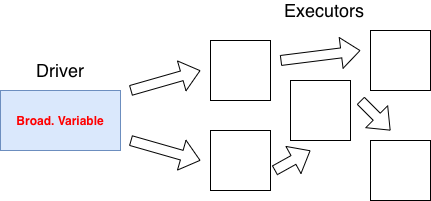

Basicamente, uma varíavel de broadcast é criada no Driver da aplicação e depois armazenada em cada executor. Esse recurso é útil quando se tem a necessidade de passar um parâmetro grande (um grande dicionário em Python ou um modelo de Machine Learning) dentro de funções utilizadas em `UDFs` ou operações do tipo `map`. A principal vantagem é:

- Utilizando as Broadcast variables, não é necessário reenviar a mesma estrutura de dados a cada job para os executores porque isso implica em **serializar/deserializar** aquela estrutura repetidamente

Obs.: As Broadcast Variables só são de fato distribuídas ao longo dos executores quando ocorre uma ação devido ao conceito de *Lazy Evaluation*

##### Criando um RDD simples

In [ ]:
sc = spark.sparkContext

In [ ]:
my_collection = "Spark The Definitive Guide : Big Data Processing Made Simple".split(" ")
words = spark.sparkContext.parallelize(my_collection, 2)

In [ ]:
words.take(10)

['Spark',
 'The',
 'Definitive',
 'Guide',
 ':',
 'Big',
 'Data',
 'Processing',
 'Made',
 'Simple']

##### Definindo a estrutura a ser mantida como Broadcast Variable

In [ ]:
supplemental_data = {"Spark":1000, "Definitive":200, "Big":-300, "Simple":100}

In [ ]:
supplemental_data.get("Igor", 0)

0

##### Criando a Broadcast Variable

In [ ]:
supp_broadcast = sc.broadcast(supplemental_data)

In [ ]:
supp_broadcast.value

{'Big': -300, 'Definitive': 200, 'Simple': 100, 'Spark': 1000}

##### Usando a Broadcast Variable

In [ ]:
words \
    .map(lambda word: (word, supp_broadcast.value.get(word, 0)))\
    .sortBy(lambda wordPair: wordPair[1])\
    .collect()

[('Big', -300),
 ('The', 0),
 ('Guide', 0),
 (':', 0),
 ('Data', 0),
 ('Processing', 0),
 ('Made', 0),
 ('Simple', 100),
 ('Definitive', 200),
 ('Spark', 1000)]

### Accumulators
Os Accumlators podem ser entendidos da seguinte forma:

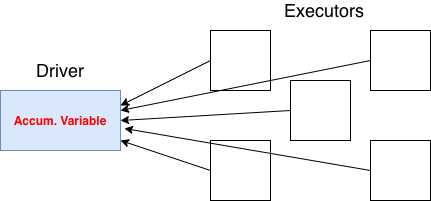

Os Accumulators são uma forma segura e eficiente de atualizar uma um valor ao longo de transformações e propagar esse valor para o Driver da aplicação. O Spark suporta nativamente acumuladores numéricos em que é possível contar ou somar valores

Obs.: Os Accumulators só são de fato executados quando ocorre uma ação devido ao conceito de *Lazy Evaluation*.

##### Criando o Accumulator
O acumulador irá contar a quantidade de linhas que contém a Platform "Wii" 

In [ ]:
acc_wii = sc.accumulator(0)
acc_wii

Accumulator<id=0, value=0>

##### Carregando o dataset em um Dataframe

In [ ]:
data_dir = "vgsales.csv"

df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")

In [ ]:
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

##### Definindo a função para incrementar o acumulador

In [ ]:
#não rodar
def acc_wii_platform(row):
  platform = row["Platform"]
  if platform == "Wii":
    acc_wii.add(1)

##### Usando o acumulador

In [ ]:
rdd2 = df.rdd.map(lambda row: acc_wii_platform(row))
a = rdd2.collect()

In [ ]:
df.foreach(lambda row: acc_wii_platform(row))

In [ ]:
acc_wii.value

2650

# Exercícios 

Utilize o RDD abaixo para realizar as questões

1) Realize o output do RDD em uma partição no formato de texto.

In [ ]:
text = "At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures. A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the function to each task. Sometimes, a variable needs to be shared across tasks, or between tasks and the driver program. Spark supports two types of shared variables: broadcast variables, which can be used to cache a value in memory on all nodes, and accumulators, which are variables that are only added to, such as counters and sums"
words = text.split(" ")

In [ ]:
words_rdd = sc.parallelize(words)

In [ ]:
words_rdd.collect()

In [ ]:
words_rdd \
    .repartition(2) \
    .saveAsTextFile("./output/words_txt_ex")

In [ ]:
!ls ./output/words_txt_ex

part-00000  part-00001	_SUCCESS


In [ ]:
!head -n 5 ./output/words_txt_ex/part-00000

At
a
high
level,
every


In [ ]:
#versão do professor

rdd = sc.parallelize(words)

rdd.coalesce(1)\
  .saveAsTextFile('./output/words')

2) Utilizando o dicionário de pesos abaixo:

In [ ]:
weights_words = {
    "spark": 1000,
    "parallel": 500,
    "function": 300,
    "driver": 400
}

rdd = sc.parallelize(weights_words)

Escreva um RDD que mostre a palavra, a quantidade de vezes que aquela palavra se repete e o peso dela, dado o RDD de pesos acima:

In [ ]:
text = "At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. RDDs are created by starting with a file in the Hadoop file system (or any other Hadoop-supported file system), or an existing Scala collection in the driver program, and transforming it. Users may also ask Spark to persist an RDD in memory, allowing it to be reused efficiently across parallel operations. Finally, RDDs automatically recover from node failures. A second abstraction in Spark is shared variables that can be used in parallel operations. By default, when Spark runs a function in parallel as a set of tasks on different nodes, it ships a copy of each variable used in the function to each task. Sometimes, a variable needs to be shared across tasks, or between tasks and the driver program. Spark supports two types of shared variables: broadcast variables, which can be used to cache a value in memory on all nodes, and accumulators, which are variables that are only added to, such as counters and sums"
words = text.split(" ")

In [ ]:
words_rdd = sc.parallelize(words)

In [ ]:
#verificar a versão do professor
word_count = words_rdd \
  .map(lambda x: (x, 1)) \
  .reduceByKey(lambda x, y: x + y)\
  .sortBy(lambda x: x[1]* -1)

word_count.take(10)



[('a', 11),
 ('in', 9),
 ('the', 7),
 ('Spark', 6),
 ('of', 6),
 ('and', 5),
 ('be', 5),
 ('to', 5),
 ('parallel', 4),
 ('that', 4)]

In [ ]:
weights_broadcast.value

In [ ]:
#definindo a variável de broadcast
weights_broadcast = sc.broadcast(weights_words)

In [ ]:
word_count.map(lambda line: (line[0], line[1],weights_broadcast.value.get(line[0],-1))).take(10)

[('a', 11, -1),
 ('in', 9, -1),
 ('the', 7, -1),
 ('Spark', 6, -1),
 ('of', 6, -1),
 ('and', 5, -1),
 ('be', 5, -1),
 ('to', 5, -1),
 ('parallel', 4, 500),
 ('that', 4, -1)]

3) Escreva um código que conte a quantidade de linhas totais no RDD utilizando os accumulators

In [ ]:
#versão do professor
acc_counter = sc.accumulator(0)

words_rdd.foreach(lambda row: acc_counter.add(1))

acc_counter.value

214

In [ ]:
words_rdd.count()

214

# Questões de revisão

# Questão 1
Utilizando o dataset vgsales:

https://www.kaggle.com/gregorut/videogamesales/data.

Recupere a quantidade de vendas globais (Global_Sales) da plataforma PS4, agrupado por gênero (Genre) entre os anos 2013 a 2019:

Obs.: realizar duas transformações. A primeira utilizando SparkSQL e a segunda utilizando PySpark.

In [ ]:
data_vgsales = "vgsales1.csv"

In [ ]:
df_vgsales = spark.read.load(data_vgsales, format="csv", inferSchema="true", header="true")

In [ ]:
df_vgsales.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



In [ ]:
df_vgsales.show(10)

+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing| Nintendo|   11.27|    8.89|   10.22|        1.0|       31.37|
|   6|              Tetris|      GB|1989|      Puzzle| Nintendo|

In [ ]:
def display_df(df_vgsales, n=20):
    return df.limit(n).toPandas()

display_df(df)
#df.show()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df_vgsales.columns

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

**Pyspark API**

In [ ]:
#preciso pegar o gabarito

import pyspark.sql.functions as f  #precisa importa a função para a leitura abaixo

sales_PS4 = df_vgsales.select('Platform','Genre','Global_Sales','Year') \
    .where('Platform in ("PS4")') \
    .filter((f.col('Year')>=2013)&(f.col('Year')<=2019))\
    .groupBy('Platform','Genre','Global_Sales','Year')\
    .agg(
        f.count('Global_sales').alias('Global_sales_TotalQuantity')
        )\
    .orderBy(f.desc('Global_sales_TotalQuantity'))\
    .na.fill(0)

In [ ]:

display_df(sales_PS4)

In [ ]:
import pyspark.sql.functions as f  #precisa importa a função para a leitura abaixo

sales_PS4_2013 = df_vgsales.select('Platform','Genre','Global_Sales','Year') \
    .where('Platform = "PS4" AND') \
    .filter((f.col('Year')>=2013)&(f.col('Year')<=2019))\
    .groupBy('Platform','Global_Sales')\
    .agg(
        f.count('Global_sales').alias('Global_sales_TotalQuantity')
        )\
    .orderBy(f.desc('Global_sales_TotalQuantity'))\
    .na.fill(0)


display_df(sales_PS4_2013)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#versão do professor

#SparkSQL
df.createOrReplaceGlobalTempView('vgsales1')
spark.sql("""
SELECT
  SUM(Global_Sales),
  COUNT(Global_Sales),
  Genre
FROM
 vgsales1
WHERE
 Platform = 'PS4'
 AND Year BEYWEEN 2013 AND 209
GROUP BY Genre 
ORDER BY gloval_sales_sum DESC
""").show()

In [ ]:
#Pyspark

df2 = df.select('Platform','Year','Genre')\
  .where('Platform = "PS4" AND Year BETWEEN 2013 AND 2019') \
  .groupBy('Genre')\
  .agg(
      f.sum('Global_Sales')
  )